In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
!pip install fastai
from fastai.vision import *

In [126]:
URLs.MNIST_TINY
URL = 'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars' # removed .tgz from the String


The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [125]:
path = untar_data(URL)

OSError: ignored

In [112]:
path.ls()


[PosixPath('/root/.fastai/data/cifar/test'),
 PosixPath('/root/.fastai/data/cifar/train'),
 PosixPath('/root/.fastai/data/cifar/labels.txt')]

In [0]:
path_train = path/'train'
path_test = path/'test'


In [115]:
fnames = get_image_files(path_train)

fnames

[PosixPath('/root/.fastai/data/cifar/train/15048_frog.png'),
 PosixPath('/root/.fastai/data/cifar/train/18439_truck.png'),
 PosixPath('/root/.fastai/data/cifar/train/7606_horse.png'),
 PosixPath('/root/.fastai/data/cifar/train/7538_frog.png'),
 PosixPath('/root/.fastai/data/cifar/train/4418_bird.png'),
 PosixPath('/root/.fastai/data/cifar/train/21566_deer.png'),
 PosixPath('/root/.fastai/data/cifar/train/27385_frog.png'),
 PosixPath('/root/.fastai/data/cifar/train/21584_truck.png'),
 PosixPath('/root/.fastai/data/cifar/train/30743_airplane.png'),
 PosixPath('/root/.fastai/data/cifar/train/24502_airplane.png'),
 PosixPath('/root/.fastai/data/cifar/train/38968_frog.png'),
 PosixPath('/root/.fastai/data/cifar/train/45490_horse.png'),
 PosixPath('/root/.fastai/data/cifar/train/4609_automobile.png'),
 PosixPath('/root/.fastai/data/cifar/train/6427_bird.png'),
 PosixPath('/root/.fastai/data/cifar/train/9733_bird.png'),
 PosixPath('/root/.fastai/data/cifar/train/47156_truck.png'),
 PosixPath(

In [0]:
np.random.seed(2)
pat = re.compile(r'/([.]?)\d+_\w+.png$')

bs = 64
data = ImageDataBunch.from_name_re(path_train, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

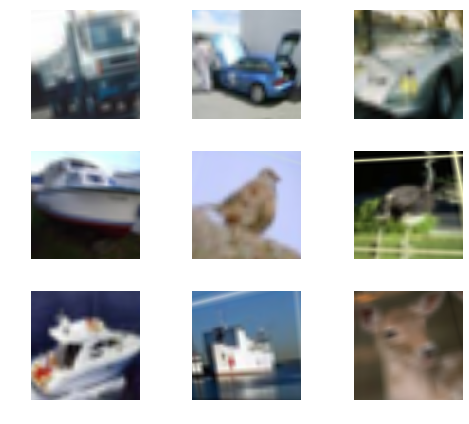

In [119]:
data.show_batch(rows = 3, figsize = (7, 6))

In [121]:
data.classes

['']

In [0]:
learner = create_cnn(data, models.resnet34, metrics = error_rate)

In [123]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate


KeyboardInterrupt: ignored